In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

# 伝達関数
$$
G(s) = \dfrac{2.5}{s(0.5s+1)(0.1s+1)}
$$

In [2]:
def g(w):
    s = 1j*w
    # return 2.5 / (0.05*s*s*s + 0.6*s*s + s + 2.5)
    return 2.5 / (0.05*s*s*s + 0.6*s*s + s)

# 根軌跡の描画

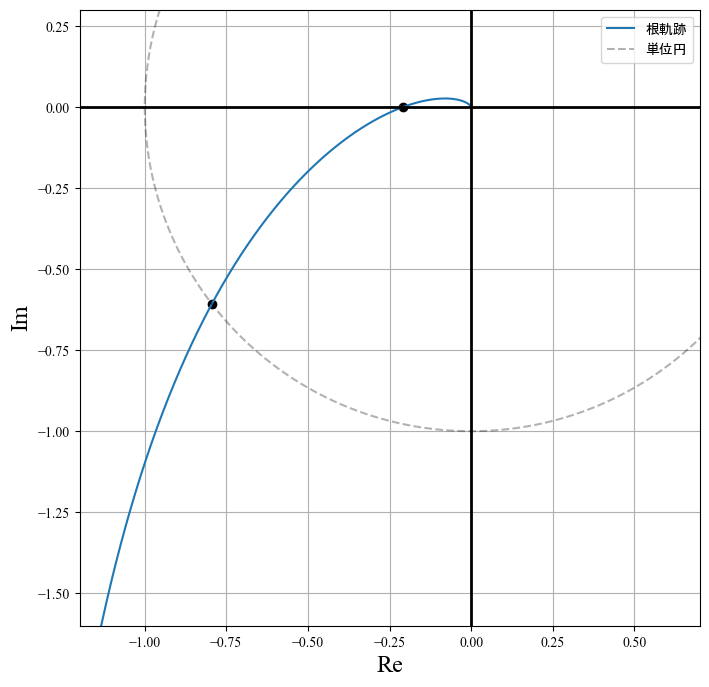

In [3]:
plt.rcParams["font.family"] = "Times New Roman, MS Gothic"

w = np.logspace(0, 2, 10000)
r = g(w)
plt.figure(figsize=(8, 8))
plt.plot(r.real, r.imag, label="根軌跡")

t = np.linspace(0, 2*np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
plt.plot(x, y, ls="--", color="black", alpha=0.3, label="単位円")

gain_idx = np.argmin(np.abs(r.imag))
plt.scatter(r.real[gain_idx], r.imag[gain_idx], color="black")

phase_idx = np.argmin(np.abs(1 - (r.imag**2 + r.real**2)))
plt.scatter(r.real[phase_idx], r.imag[phase_idx], color="black")


plt.axhline(0, color="black", lw=2)
plt.axvline(0, color="black", lw=2)

plt.xlim([-1.2, 0.7])
plt.ylim([-1.6, 0.3])

plt.xlabel("Re", size="xx-large")
plt.ylabel("Im", size="xx-large")

plt.grid()
plt.legend()

# 位相余有，ゲイン余有の数値計算

In [4]:
# ゲイン
# 虚部が0に最も近づく点
idx = np.argmin(np.abs(r.imag))
gain_margin = -20*np.log10(np.abs(r.real[idx]))

# 単位円との交点
phase_idx = np.argmin(np.abs(1 - (r.imag**2 + r.real**2)))
phase_margin = 180 + np.rad2deg(cmath.phase(r[phase_idx]))

print(
f"""
Gain Margin : {gain_margin:.2f} [dB]
Phase Margin: {phase_margin:.2f} [deg]
"""
)


Gain Margin : 13.62 [dB]
Phase Margin: 37.39 [deg]



# ボード線図

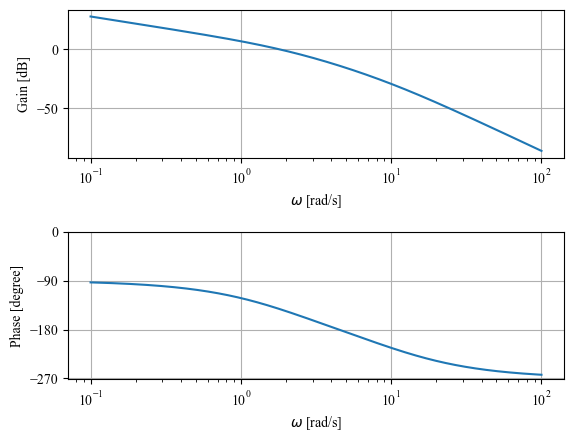

In [5]:
w = np.logspace(-1, 2, 10000)
r = g(w)
gain = 20*np.log10(np.abs(r))
phase = np.arctan2(r.imag, r.real) * 180 / np.pi
phase = [i if i<10 else i-360 for i in phase]

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)

ax0 = fig.add_subplot(211)
ax0.plot(w, gain)
ax0.set_xscale("log")
ax0.set_xlabel("$\omega$ [rad/s]")
ax0.set_ylabel("Gain [dB]")
ax0.grid()

ax1 = fig.add_subplot(212)
ax1.plot(w, phase)
ax1.set_xscale("log")
# ax1.set_ylim([-5, 185])
ax1.set_yticks([-270, -180, -90, 0])
ax1.set_xlabel("$\omega$ [rad/s]")
ax1.set_ylabel("Phase [degree]")
ax1.grid()

plt.show()